### Import libraries

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.utils import shuffle
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras import Sequential, layers

In [57]:
import warnings
warnings.filterwarnings("ignore")

### Read Data

In [9]:
cloudy = glob.glob('data/cloudy/*.jpg')
desert = glob.glob('data/desert/*.jpg')
green_area = glob.glob('data/green_area/*.jpg')
water = glob.glob('data/water/*.jpg')

### Read image data from all files and store it in a variable, Store the label as well

In [13]:
image = []
labels = []

for i in cloudy:
    img1 = plt.imread(i)
    image.append(img1)
    labels.append(0)

for i in desert:
    img2 = plt.imread(i)
    image.append(img2)
    labels.append(1)

for i in green_area:
    img3 = plt.imread(i)
    image.append(img3)
    labels.append(2)

for i in water:
    img4 = plt.imread(i)
    image.append(img4)
    labels.append(3)

### Plot some images

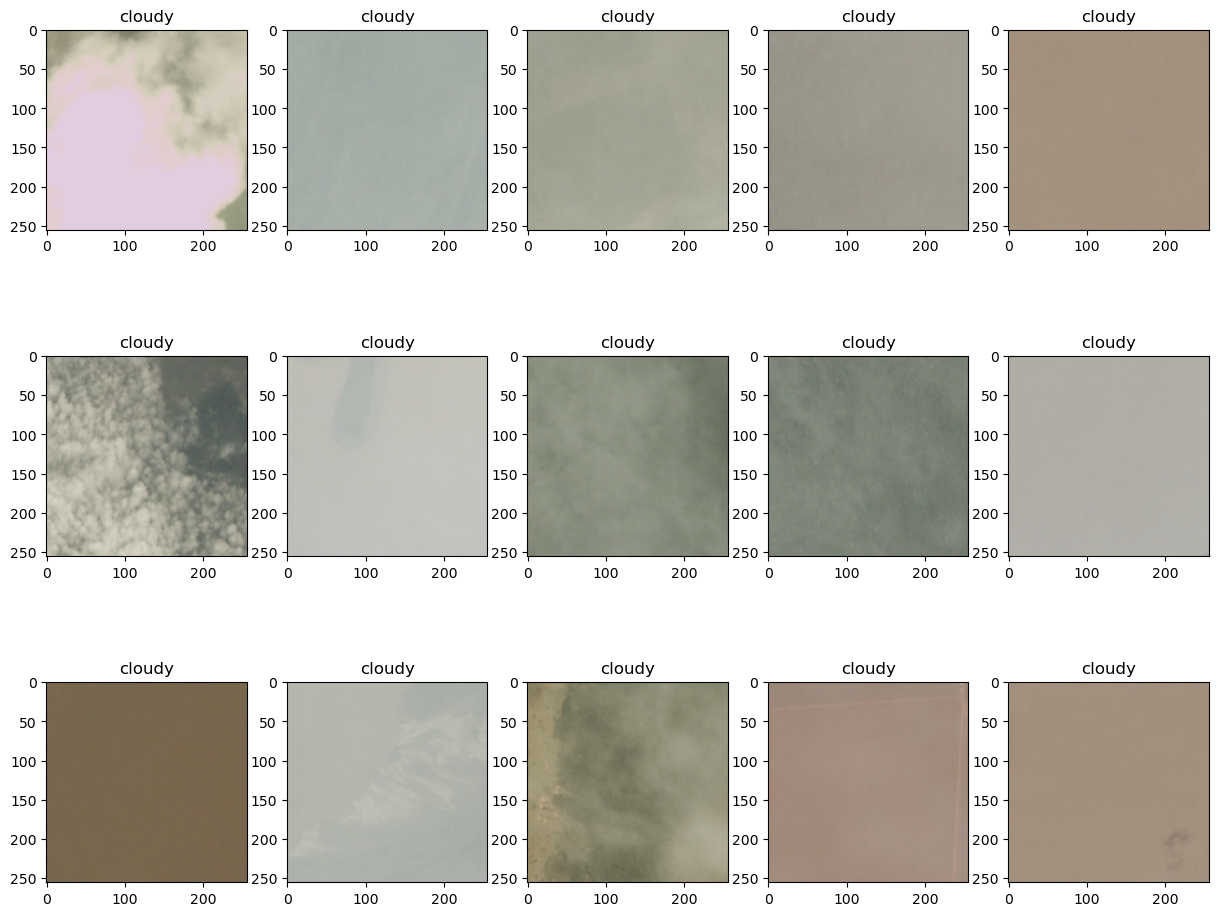

In [17]:
plt.figure(figsize = (15,12))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(image[i])
    if labels[i] == 0:
        plt.title("cloudy")
    elif labels[i] == 1:
        plt.title("desert")
    elif labels[i] == 2:
        plt.title("green_area")
    elif labels[i] == 3:
        plt.title("water")
    

### Shuffle the images and plot

In [21]:
image, labels = shuffle(image,labels)

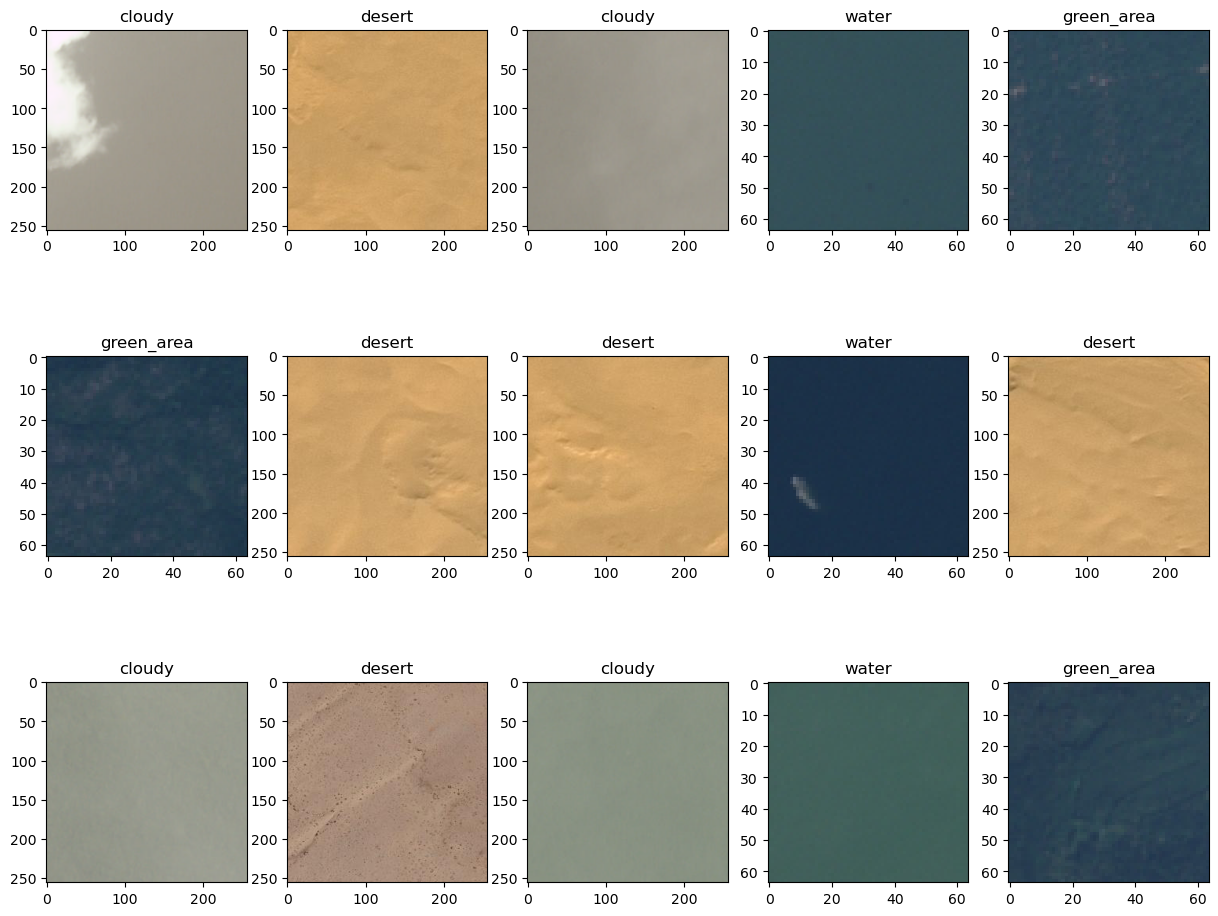

In [23]:
plt.figure(figsize = (15,12))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(image[i])
    if labels[i] == 0:
        plt.title("cloudy")
    elif labels[i] == 1:
        plt.title("desert")
    elif labels[i] == 2:
        plt.title("green_area")
    elif labels[i] == 3:
        plt.title("water")

### Check the shape of some of the images and reshape them to same size

In [27]:
for i in range(10):
    print(image[i].shape)

(256, 256, 4)
(256, 256, 3)
(256, 256, 4)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(256, 256, 3)
(256, 256, 3)
(64, 64, 3)
(256, 256, 3)


In [29]:
X = []

for i in image:
    X.append(resize(i, (64,64,3)))
    

### Convert image and label to array

In [33]:
X = np.array(X)
y = np.array(labels)

### Split into train test set

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3)

In [41]:
X_train.shape

(3941, 64, 64, 3)

In [43]:
y_train.shape

(3941,)

### Create Keras Sequential model 

In [59]:
model = Sequential()

model.add(layers.Conv2D(16,(3,3),activation = 'relu', input_shape = (64,64,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(32,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation ='relu'))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(4, activation = 'softmax'))

### Compile our model

In [63]:
model.compile(optimizer ='adam', loss ='sparse_categorical_crossentropy', metrics = ['accuracy'])

### Check model summary

In [67]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 62, 62, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 31, 31, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │         401,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 408,772 (1.56 MB)

 Trainable params: 408,772 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [73]:
model.fit(X_train,y_train,epochs = 10, steps_per_epoch= 4, validation_split = 0.1)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 492ms/step - accuracy: 0.2545 - loss: 1.3564 - val_accuracy: 0.4785 - val_loss: 1.0999
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 355ms/step - accuracy: 0.4617 - loss: 1.0829 - val_accuracy: 0.4911 - val_loss: 0.8982
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 367ms/step - accuracy: 0.4597 - loss: 0.9234 - val_accuracy: 0.4962 - val_loss: 0.8077
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 336ms/step - accuracy: 0.4738 - loss: 0.8277 - val_accuracy: 0.4962 - val_loss: 0.7668
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 339ms/step - accuracy: 0.4738 - loss: 0.7834 - val_accuracy: 0.4962 - val_loss: 0.7162
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 354ms/step - accuracy: 0.4730 - loss: 0.7355 - val_accuracy: 0.4937 - val_loss: 0.6742
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 338ms/step - accuracy: 0.4770 - loss: 0.6949 - val_accuracy: 0.6582 - val_loss: 0.6140
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 339ms/step - accuracy: 0.6831 - loss: 0.6289 - val_accuracy: 0.7316 - val_loss:

### Evaluate our model

In [77]:
model.evaluate(X_train,y_train)

124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8223 - loss: 0.3712


[0.369750440120697, 0.8266937136650085]

In [79]:
### Make predictions with X_test

In [81]:
prediction = model.predict(X_test)

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [83]:
prediction[:5]

array([[5.4229002e-02, 1.2950103e-03, 3.9563251e-01, 5.4884344e-01],
       [4.3860186e-02, 1.2113010e-03, 3.7973991e-01, 5.7518858e-01],
       [9.7705245e-01, 3.7075476e-06, 7.8952333e-05, 2.2864819e-02],
       [1.5635884e-06, 9.9999654e-01, 4.1124039e-07, 1.4707717e-06],
       [3.3726174e-02, 6.2377290e-03, 4.6573150e-01, 4.9430460e-01]],
      dtype=float32)

In [85]:
y_pred = [np.argmax(element) for element in prediction]
y_pred[:5]

[3, 3, 0, 1, 3]

In [87]:
y_test[:5]

array([2, 3, 0, 1, 2])

In [89]:
#plot

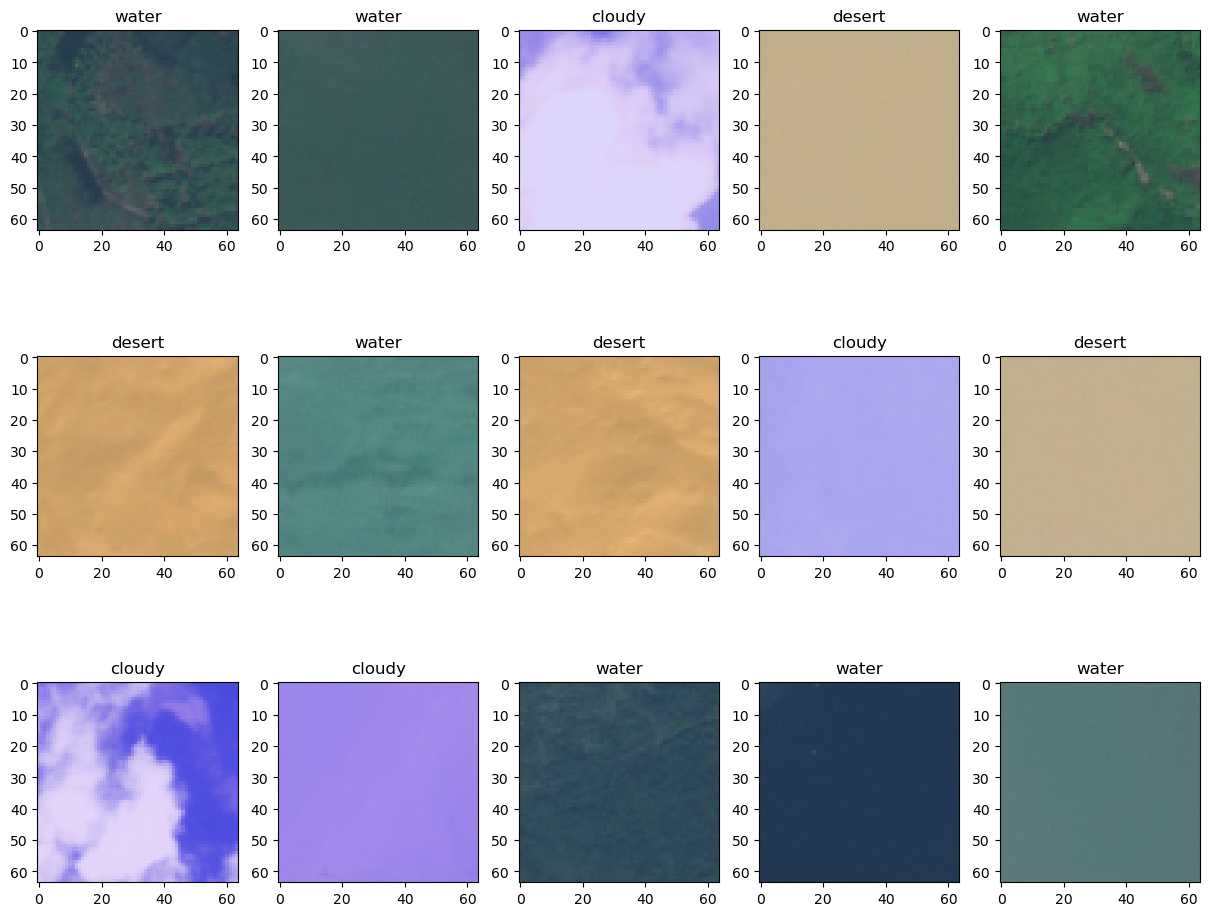

In [91]:
plt.figure(figsize = (15,12))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(X_test[i])
    if y_pred[i] == 0:
        plt.title("cloudy")
    elif y_pred[i] == 1:
        plt.title("desert")
    elif y_pred[i] == 2:
        plt.title("green_area")
    elif y_pred[i] == 3:
        plt.title("water")

In [93]:
### Visualise confusion matrix on a heatmap

<Axes: >

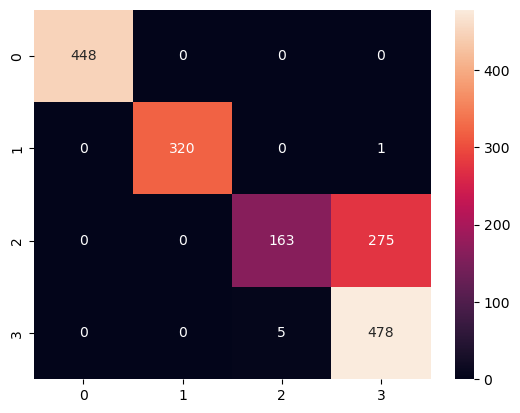

In [99]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt ='d')